Author: Nelson Liu

Email: [nliu@uncharted.software](mailto:nliu@uncharted.software)

# SIR-Quarantine-Travel Stratification Example

Example use case for multi-stratification:
1. SIR `x` Quarantine = SIR_Q
2. SIR_Q `x` Travel = SIR_Q_Travel


In [6]:
# Libraries
using AlgebraicPetri, AlgebraicPetri.TypedPetri
using Catlab.Programs, Catlab.Graphics
using Catlab.CategoricalAlgebra
using GraphViz

## Define Ontology

In [7]:
const infectious_ontology = LabelledPetriNet(
    [:Pop],
    :infect => ((:Pop, :Pop) => (:Pop, :Pop)),
    :disease => (:Pop => :Pop),
    :strata => (:Pop => :Pop)
)

#Graph(infectious_ontology)
to_graphviz(infectious_ontology)

LoadError: MethodError: no method matching to_graphviz(::LabelledPetriNet)
[0mClosest candidates are:
[0m  to_graphviz([91m::Catlab.WiringDiagrams.DirectedWiringDiagrams.WiringDiagram[39m; graph_name, orientation, node_labels, labels, label_attr, port_size, junction_size, outer_ports, anchor_outer_ports, graph_attrs, node_attrs, title, node_colors, edge_attrs, cell_attrs) at ~/.julia/packages/Catlab/87RDU/src/graphics/GraphvizWiringDiagrams.jl:81
[0m  to_graphviz([91m::Subobject{<:Catlab.Graphs.BasicGraphs.HasGraph}[39m; kw...) at ~/.julia/packages/Catlab/87RDU/src/graphics/GraphvizGraphs.jl:316
[0m  to_graphviz([91m::Catlab.WiringDiagrams.UndirectedWiringDiagrams.AbstractUWD[39m; kw...) at ~/.julia/packages/Catlab/87RDU/src/graphics/GraphvizWiringDiagrams.jl:408
[0m  ...

In [8]:
## Define Base Models

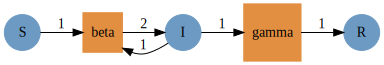

In [11]:
# SIR model
sir_uwd = @relation () where (S::Pop, I::Pop, R::Pop) begin
    infect(S, I, I, I)
    disease(I, R)
end

to_graphviz(sir_uwd, box_labels = :name, junction_labels = :variable)

tnames = [:beta, :gamma]
typed_sir = oapply_typed(infectious_ontology, sir_uwd, tnames)
Graph(dom(typed_sir))

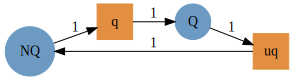

In [36]:
# Quarantine model
quarantine_uwd = @relation () where (NQ::Pop, Q::Pop) begin
    strata(NQ, Q)
    strata(Q, NQ)
end

to_graphviz(quarantine_uwd, box_labels = :name, junction_labels = :variable)

tnames = [:q, :uq]
typed_quarantine = oapply_typed(infectious_ontology, quarantine_uwd, tnames)
Graph(dom(typed_quarantine))

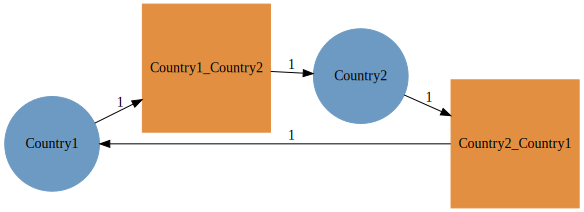

In [19]:
# Travel model
M = 2
snames = [Symbol("Country$i") for i in 1:M]

# Need a function like `pairwise_id_typed_petri` but without identity
travel_uwd = @relation () where (Country1::Pop, Country2::Pop) begin
    strata(Country1, Country2)
    strata(Country2, Country1)
end

to_graphviz(travel_uwd, box_labels = :name, junction_labels = :variable)

tnames = [:Country1_Country2, :Country2_Country1]
typed_travel = oapply_typed(infectious_ontology, travel_uwd, tnames)
Graph(dom(typed_travel))

In [ ]:
## Stratify (1)



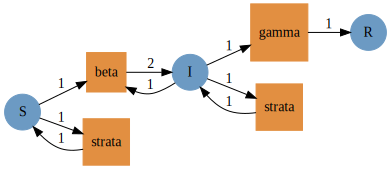

In [42]:
# Augment SIR model for S,I-only quarantine
typed_sir_aug = add_reflexives(
    typed_sir,
    [[:strata], [:strata], []],
    infectious_ontology
)

Graph(dom(typed_sir_aug))

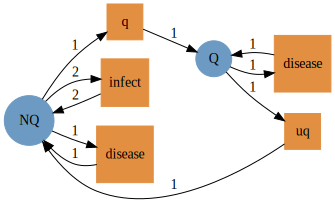

In [43]:
# Augment quarantine model
typed_quarantine_aug = add_reflexives(
    typed_quarantine,
    [[:infect, :disease], [:disease]],
    infectious_ontology
)

Graph(dom(typed_quarantine_aug))

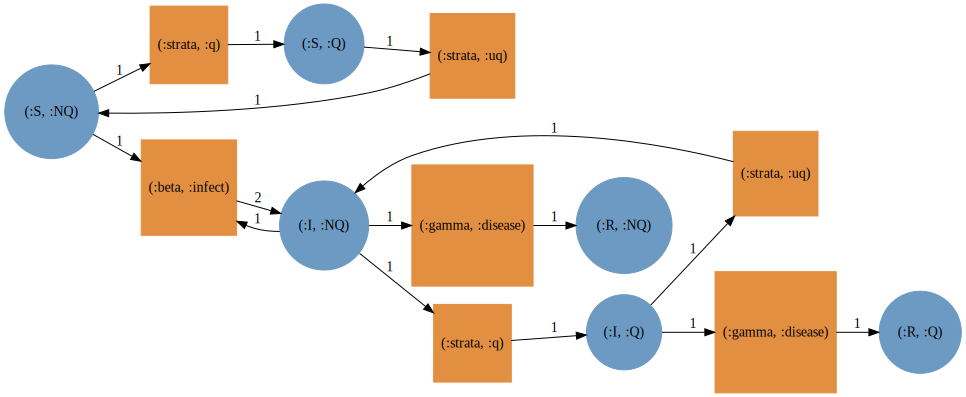

In [44]:
# Stratify SIR and Quarantine models
typed_sir_quarantine = typed_product(typed_sir_aug, typed_quarantine_aug)

Graph(dom(typed_sir_quarantine))

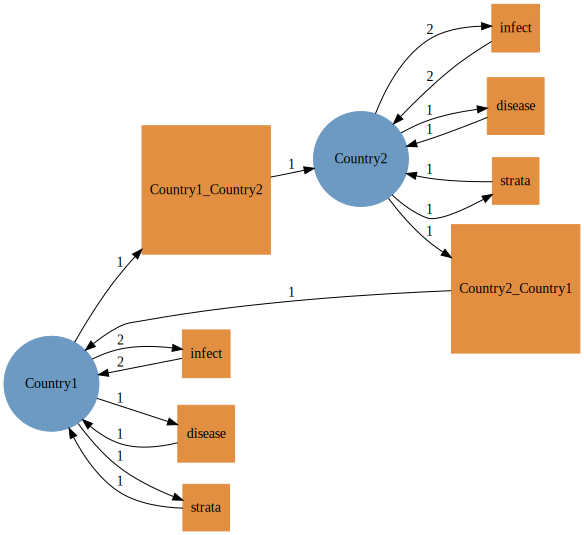

In [45]:
# Augment travel model
typed_travel_aug = add_reflexives(
    typed_travel,
    repeat([[:infect, :disease, :strata]], M),
    infectious_ontology
)

Graph(dom(typed_travel_aug))

In [ ]:
# Augment the SIR-Quarantine model
# add :strata to permit travel

# Stratify the SIR-Quarantine with the travel model